In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BIKE DETAILS.csv')

In [3]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [4]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [5]:
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [6]:
df.shape

(1061, 7)

In [7]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [8]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [9]:
#Q1. What is the range of selling prices in the dataset?
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(min_price)
print(max_price)

5000
760000


In [10]:
#Q2. What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()
print(median_price)

45000.0


In [11]:
#Q3. What is the most common seller type?
common_seller = df['seller_type'].mode().values[0]
print(common_seller)

Individual


In [12]:
#Q4.How many bikes have driven more than 50,000 kilometers?
count_bikes = (df['km_driven'] > 50000).sum()
print(count_bikes)

170


In [13]:
#Q5. What is the average km_driven value for each ownership type?
average = df.groupby('owner')['km_driven'].mean()
print(average)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [14]:
#Q6. What proportion of bikes are from the year 2015 or older?
bikes = (df['year'] >= 2015).sum()
total_bikes = len(df)
proportion = bikes / total_bikes
print(proportion)

0.527803958529689


In [15]:
#7. What is the trend of missing values across the dataset?
missing_values_count = df.isnull().sum()
missing_values_proportion = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Proportion (%)': missing_values_proportion
})

print(missing_summary)

                   Missing Values  Proportion (%)
name                            0        0.000000
selling_price                   0        0.000000
year                            0        0.000000
seller_type                     0        0.000000
owner                           0        0.000000
km_driven                       0        0.000000
ex_showroom_price             435       40.999057


In [16]:
#8.What is the highest ex_showroom_price recorded, and for which bike?
price_row = df.loc[df['ex_showroom_price'].idxmax()]
highest_price = price_row['ex_showroom_price']
bike_name = price_row['name']
print(highest_price)
print(bike_name)

1278000.0
Harley-Davidson Street Bob


In [17]:
#Q9. what is the total number of bike listeed by each seller type?
seller_type = df['seller_type'].value_counts()
seller_type

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

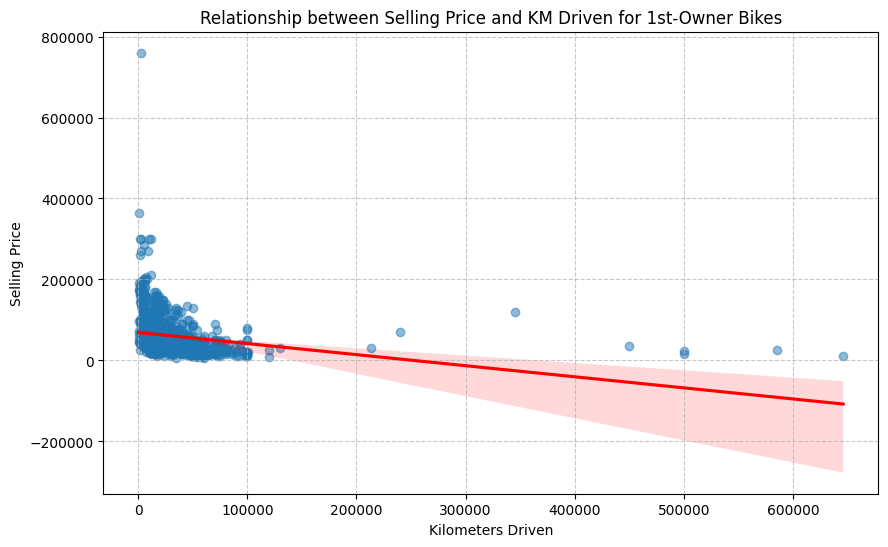

In [29]:
#Q10. what is the relationship between selling price and km drive for first-ower bikes?
first_owner_bikes = df[df['owner'] == '1st owner']

if len(first_owner_bikes) == 0:
    print("No data found for first owner bikes. Check if '1st owner' matches your data's format.")
else:
    plt.figure(figsize=(10, 6))  
    sns.regplot(x='km_driven', 
                y='selling_price', 
                data=first_owner_bikes,
                scatter_kws={'alpha': 0.5},  
                line_kws={'color': 'red'})   
    
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Selling Price')
    plt.title('Relationship between Selling Price and KM Driven for 1st-Owner Bikes')
    
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.show()
 
    correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])

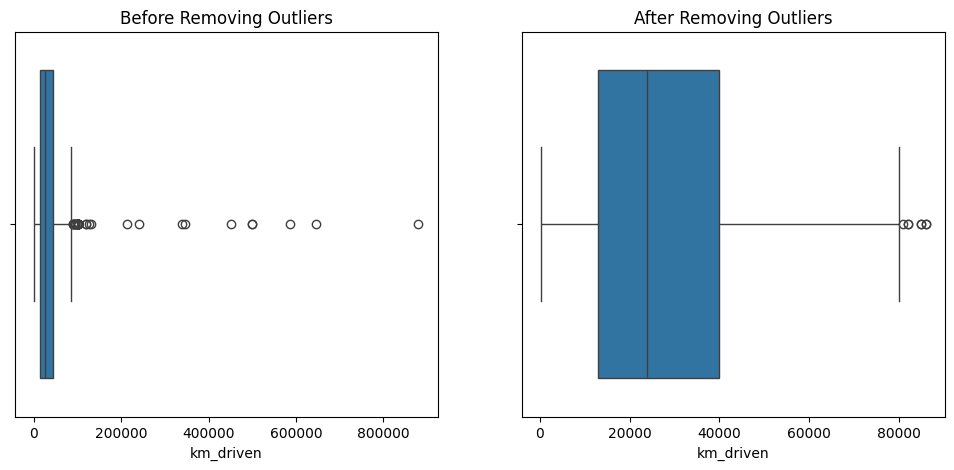

In [31]:
#Q11. Indentify and remove outliers in the km drien column using the IOR method?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df['km_driven'])
plt.title("Before Removing Outliers")

# After removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['km_driven'])
plt.title("After Removing Outliers")

plt.show()


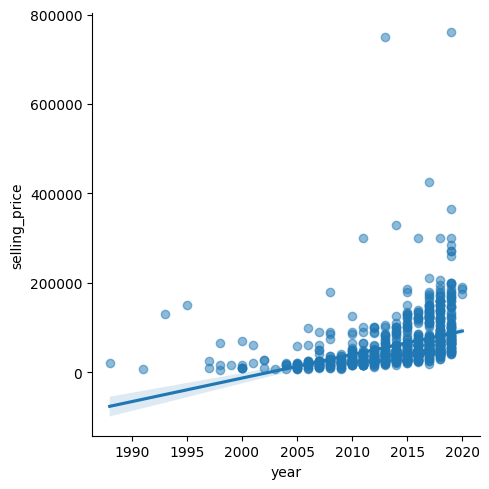

In [20]:
#Q12. Perform a bivariate analysis to visualize the relationship between year and sellin price?
sns.lmplot(x = "year", y="selling_price", data= df, scatter_kws={'alpha':0.5})

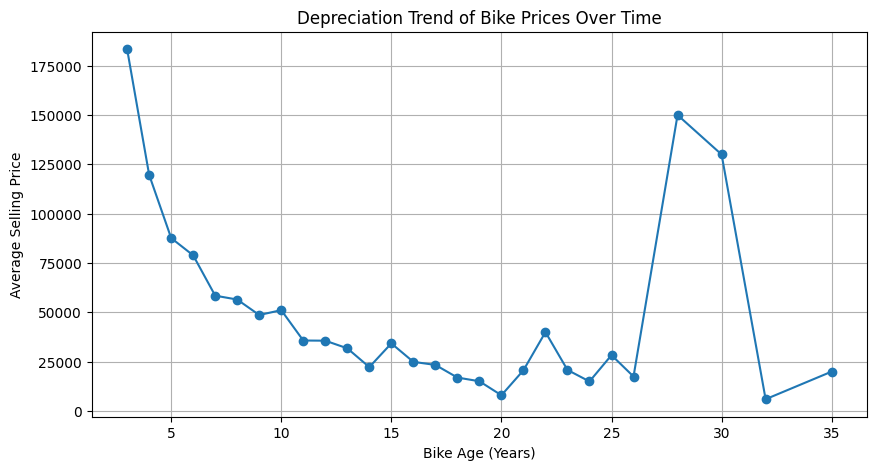

In [33]:
#Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year
plt.figure(figsize=(10, 5))
average_depreciation.plot(marker='o', linestyle='-')
plt.xlabel("Bike Age (Years)")
plt.ylabel("Average Selling Price")
plt.title("Depreciation Trend of Bike Prices Over Time")
plt.grid()
plt.show()

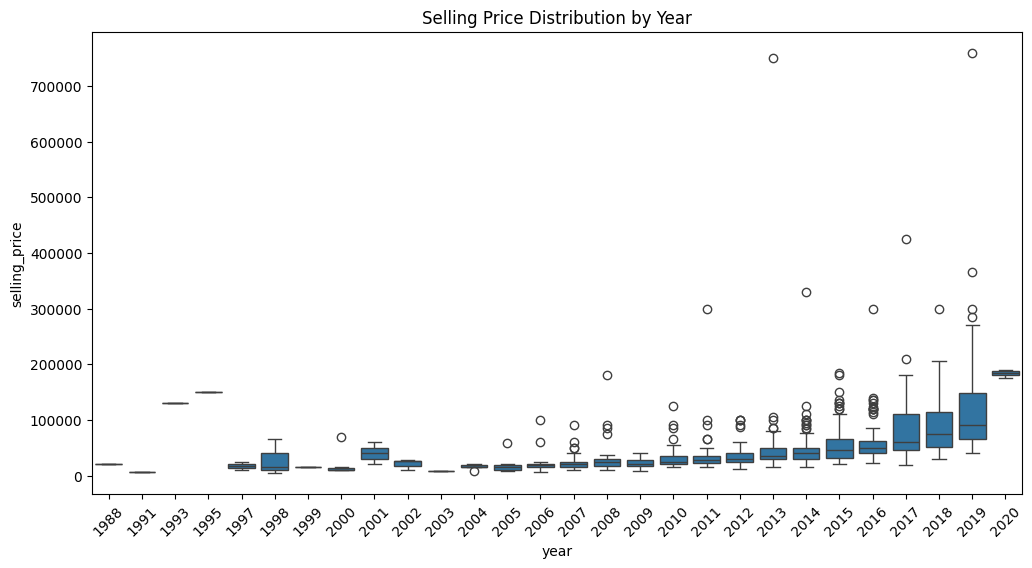

In [35]:
#Q14. Which bike names are priced significantly above the average price for their manufacturing year
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['year'], y=df['selling_price'])
plt.xticks(rotation=45)
plt.title("Selling Price Distribution by Year")
plt.show()

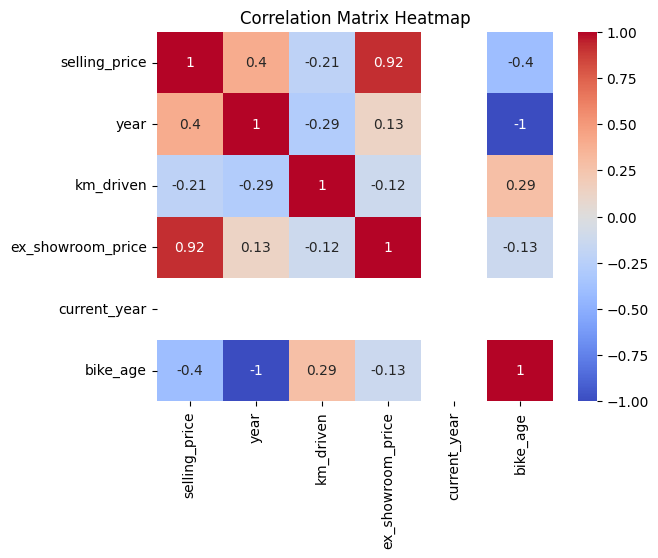

In [23]:
#Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()